In [214]:
import numpy as np
import matplotlib.pyplot as plt

In [215]:
seed = 0
n_samples = 10000
n_features = 2
n_hstates = 3

In [216]:
rnd = np.random.RandomState(seed)

## Bernoulli HMM

In [217]:
from kerasy.ML.HMM import BernoulliHMM

In [218]:
model = BernoulliHMM(n_hstates, random_state=seed)

In [219]:
samples = rnd.rand(n_samples, 1).round().astype(int)

In [220]:
model.fit(samples)

BernoulliHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.096s  log probability: -6932.359137050144

In [222]:
model.heatmap_params()

ImportError: You Need to install `seaborn`

In [221]:
model.emission

array([[0.62268276, 0.37731724],
       [0.68768748, 0.31231252],
       [0.06198365, 0.93801635]])

- `emission[k,0]` is **succes/yes probability** when hidden state is $k$.
- `emission[k,1]` is **failure/no probability** when hidden state is $k$.

Algorithm: viterbi


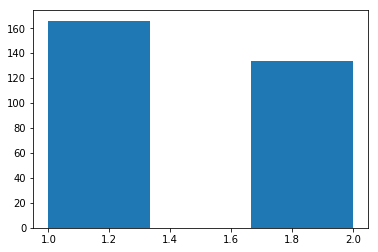

In [64]:
plt.hist(model.predict(samples[0:300]), bins=3)
plt.show()

In [69]:
samples[0:300] = samples[0]

In [70]:
model.fit(samples)

BernoulliHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.131s  log probability: -6927.407181679362

In [71]:
model.emission

array([[0.34395332, 0.65604668],
       [0.44229874, 0.55770126],
       [0.85506005, 0.14493995]])

Algorithm: viterbi
Algorithm: viterbi


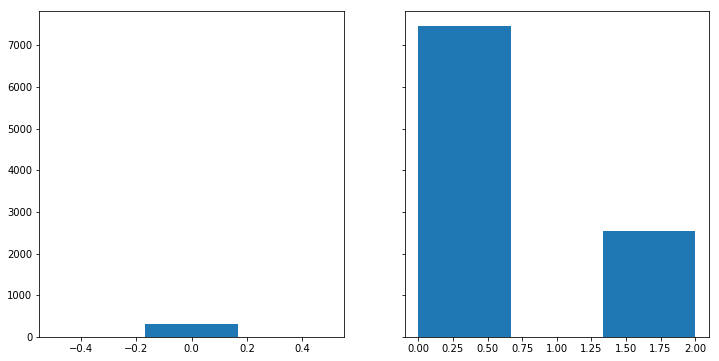

In [72]:
fig, (axL,axR) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
axL.hist(model.predict(samples[0:300]), bins=n_hstates)
axR.hist(model.predict(samples), bins=n_hstates)
plt.show()

## Multinomial HMM

In [59]:
from kerasy.ML.HMM import MultinomialHMM

In [73]:
model = MultinomialHMM(n_hstates, random_state=seed)

In [78]:
samples = rnd.uniform(low=0, high=3, size=(n_samples,1)).round().astype(int)

In [79]:
model.fit(samples)

MultinomialHMM (Baum-Welch) 02/10 [####----------------]  20.00% - 0.094s  log probability: -13290.85912531253

In [83]:
model.params_plot

AttributeError: 'MultinomialHMM' object has no attribute 'tarnsit'

In [203]:
import json

In [204]:
from kerasy.utils.param_utils import UTILS_DIR_PATH

In [205]:
UTILS_DIR_PATH

'/Users/iwasakishuto/Github/portfolio/Kerasy/kerasy/utils'

In [207]:
import os

In [209]:
path = os.path.join(UTILS_DIR_PATH, "default_params", "sns_heatmap_kwargs.json")

In [212]:
with open(path, 'r') as f:
    params = json.load(f)

In [213]:
params

{'vmin': 0,
 'vmax': 1,
 'annot': True,
 'fmt': '.3g',
 'cmap': 'binary',
 'cbar': False}

In [199]:
def heatmap_prob(self, **plot_kwargs):
    n_hstates = self.n_hstates
    n_rows = n_hstates + 1
    mk_ticklabels = lambda n:["$z_{" + f"{n},{k}" + "}$" for k in range(n_hstates)]
    
    default_plot_kwargs = {
        "vmin" : 0,
        "vmax" : 1, 
        "annot" : True,
        "fmt" : '.3g',
        "cmap" : "binary",
        "center" : 1/n_hstates, 
        "cbar" : False,
    }
    default_plot_kwargs.update(plot_kwargs)
    
    fig = plt.figure(figsize=(2*n_hstates, 2*n_rows))
    fig.suptitle('Initial hidden state probs\n&\ntransit probs')
    axi = plt.subplot2grid((n_rows, n_hstates), (0, 0), colspan=n_hstates)
    axt = plt.subplot2grid((n_rows, n_hstates), (1, 0), colspan=n_hstates, rowspan=n_hstates)
    
    sns.heatmap(
        self.initial.reshape(1,-1), ax=axi, **default_plot_kwargs,
        yticklabels=False, xticklabels=mk_ticklabels(0)
    )
    sns.heatmap(
        self.transit, ax=axt, **default_plot_kwargs,
        yticklabels=mk_ticklabels("n-1"), xticklabels=mk_ticklabels("n")
    )
    plt.show()

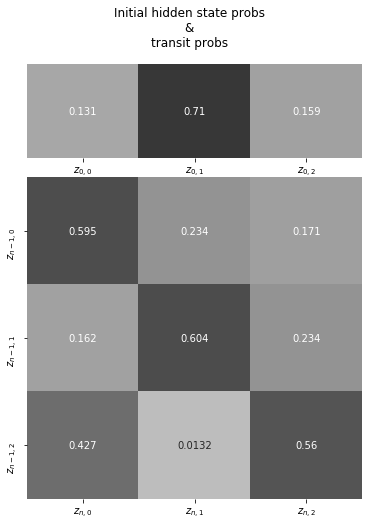

In [200]:
heatmap_prob(model)

In [ ]:
vmin=0, vmax=1, annot=True, cmap="binary", center=1/n_hstates, cbar=False,

In [156]:
ticklabels = [f"$z_{k}$" for k in range(n_hstates)] 

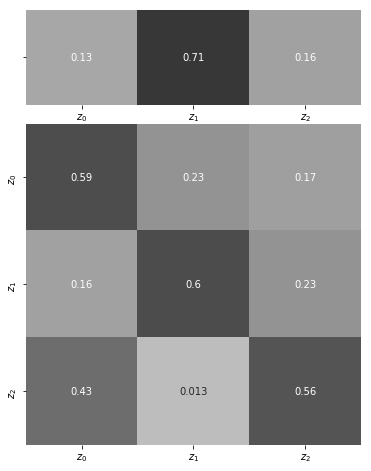

In [161]:
fig = plt.figure(figsize=(2*n_hstates, 2*(n_hstates+1)))

axi = plt.subplot2grid((1+n_hstates, n_hstates), (0, 0), colspan=n_hstates)
axi.tick_params(left=False, labelleft=False)

axt = plt.subplot2grid((1+n_hstates, n_hstates), (1, 0), colspan=n_hstates, rowspan=n_hstates, sharex=axi)

sns.heatmap(model.initial.reshape(1,-1), vmin=0, vmax=1, annot=True, cmap="binary", center=1/n_hstates, cbar=False, ax=axi)
sns.heatmap(model.transit, vmin=0, vmax=1, annot=True, cmap="binary", center=1/n_hstates, cbar=False, ax=axt, yticklabels=ticklabels, xticklabels=ticklabels)


In [152]:
[f"z{i}" for i in range(3)]

['z0', 'z1', 'z2']

In [ ]:
def plot_params_prob(figsize=4):
    n_
    fig = plt.figure(figsize=figsize)
    axi = plt.subplot

In [108]:
n_hstates = 3

(1, 23, 1, 23, 1, 23)

In [ ]:
fig = plt.figure(figsize=())

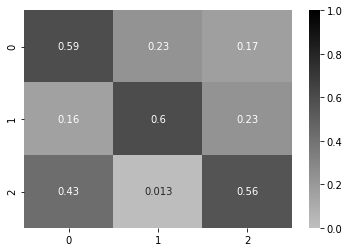

In [107]:
sns.heatmap(model.transit, center=1/3, vmin=0, vmax=1, annot=True, cmap="binary")

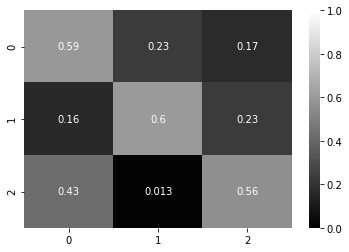

In [106]:
sns.heatmap(model.transit, vmin=0, vmax=1, annot=True, cmap="binary_r")

In [86]:
model.transit

array([[0.59492583, 0.23374357, 0.1713306 ],
       [0.16221893, 0.60386993, 0.23391114],
       [0.42692128, 0.01317156, 0.55990716]])